In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../PlantVillagePotatoDataset',
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)


Found 2152 files belonging to 3 classes.


In [18]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

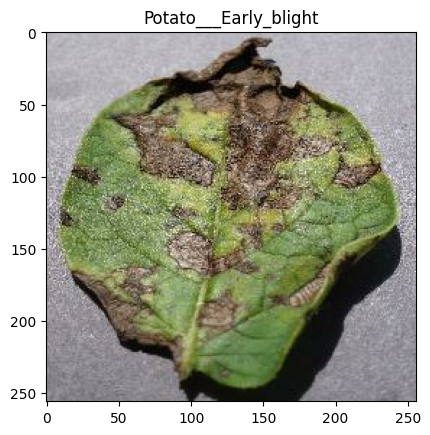

In [19]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(dataset.class_names[label_batch[0]])  
    plt.show()


In [20]:
def get_dataset_partition(ds,train_size=0.8, test_size=0.1, val_size=0.1,shuffle=True,shuffle_size=1000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_size * ds_size)
    val_size = int(val_size * ds_size)


    train_ds = ds.take(train_size)


    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, test_ds, val_ds

In [21]:
train_ds , test_ds , val_ds = get_dataset_partition(dataset)
print("Training size:", len(train_ds))
print("Testing size:", len(test_ds))
print("Validation size:", len(val_ds))

Training size: 54
Testing size: 8
Validation size: 6


**`.cache()`**: Saves the dataset in memory after the first epoch to improve performance during subsequent epochs.  
**`.shuffle(1000)`**: Randomizes the order of the dataset to help prevent overfitting by ensuring the model does not learn patterns from the order of the data.  
**`.prefetch(buffer_size=tf.data.AUTOTUNE)`**: Overlaps data preprocessing and model execution by loading data while the model is training, improving training efficiency.  

In [22]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential(
    [
       layers.Resizing(256, 256),
       layers.Rescaling(1./255) #divides each pixel value by 255.
    ]
)

In [24]:
data_augmentation = tf.keras.Sequential(
    [
       layers.RandomFlip("horizontal_and_vertical"),
       layers.RandomRotation(0.2)
    ]
)

In [25]:
input_shape = (32, 256, 256, 3)  
n_classes = 3

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
early_stop = EarlyStopping(
    monitor='val_loss',     # monitor validation loss
    mode='min',             # stop when validation loss stops decreasing
    patience=3,             # wait for 3 epochs before stopping
    restore_best_weights=True
)

In [29]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    batch_size=32,
    verbose=1,
)

Epoch 1/100
 2/54 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.3750 - loss: 1.0624

2025-07-15 17:08:06.943309: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.4981 - loss: 0.9317 - val_accuracy: 0.6510 - val_loss: 0.7633
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.7642 - loss: 0.6092 - val_accuracy: 0.8571 - val_loss: 0.3709
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8419 - loss: 0.3519 - val_accuracy: 0.8490 - val_loss: 0.3283
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9040 - loss: 0.2474 - val_accuracy: 0.9375 - val_loss: 0.2182
Epoch 5/100
 2/54 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9219 - loss: 0.1978  

2025-07-15 17:08:27.399660: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9324 - loss: 0.1852 - val_accuracy: 0.8906 - val_loss: 0.2136
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9310 - loss: 0.1827 - val_accuracy: 0.8958 - val_loss: 0.2469
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9229 - loss: 0.1865 - val_accuracy: 0.9167 - val_loss: 0.1693
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9262 - loss: 0.2000 - val_accuracy: 0.9531 - val_loss: 0.1314
Epoch 9/100


2025-07-15 17:08:47.520082: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


 2/54 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9844 - loss: 0.0509  

2025-07-15 17:08:47.999127: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9665 - loss: 0.1003 - val_accuracy: 0.9844 - val_loss: 0.0494
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9650 - loss: 0.0854 - val_accuracy: 0.9688 - val_loss: 0.0990
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9674 - loss: 0.0894 - val_accuracy: 0.8542 - val_loss: 0.3371
Epoch 12/100


2025-07-15 17:09:03.143837: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


 2/54 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9531 - loss: 0.2088  

2025-07-15 17:09:03.570941: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9338 - loss: 0.1927 - val_accuracy: 0.9688 - val_loss: 0.1238
Epoch 13/100


2025-07-15 17:09:08.272174: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


 2/54 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9922 - loss: 0.0519  

2025-07-15 17:09:08.724494: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9594 - loss: 0.1214 - val_accuracy: 0.9688 - val_loss: 0.0793
Epoch 14/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9664 - loss: 0.0831 - val_accuracy: 0.9531 - val_loss: 0.0830
Epoch 15/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9714 - loss: 0.0816 - val_accuracy: 0.9531 - val_loss: 0.1284
Epoch 16/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9629 - loss: 0.0930 - val_accuracy: 0.9323 - val_loss: 0.2115
Epoch 17/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9754 - loss: 0.0727 - val_accuracy: 0.9792 - val_loss: 0.0541
Epoch 18/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9741 - loss: 0.0914 - val_accuracy: 0.9479 - val_loss: 0.1359
Epoch 19/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9713 - loss: 0.0735 - val_accuracy: 0.9792 - val_loss: 0.0670
Epoch 20/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9823 - loss: 0.0646 - val_accuracy: 0.9427 

2025-07-15 17:10:16.616708: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9713 - loss: 0.0827 - val_accuracy: 0.9531 - val_loss: 0.1448
Epoch 27/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9834 - loss: 0.0531 - val_accuracy: 0.9740 - val_loss: 0.0802
Epoch 28/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9665 - loss: 0.0784 - val_accuracy: 0.9688 - val_loss: 0.0785
Epoch 29/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9821 - loss: 0.0565 - val_accuracy: 0.9583 - val_loss: 0.0804
Epoch 30/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9825 - loss: 0.0440 - val_accuracy: 0.9844 - val_loss: 0.0453
Epoch 31/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9878 - loss: 0.0269 - val_accuracy: 0.9271 - val_loss: 0.2597
Epoch 32/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9844 - loss: 0.0460 - val_accuracy: 0.8906 - val_loss: 0.3141
Epoch 33/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9764 - loss: 0.0513 - val_accuracy: 0.9740 

2025-07-15 17:11:24.704339: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9899 - loss: 0.0190 - val_accuracy: 0.9844 - val_loss: 0.0528
Epoch 40/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9901 - loss: 0.0272 - val_accuracy: 0.9479 - val_loss: 0.1293
Epoch 41/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9840 - loss: 0.0486 - val_accuracy: 0.9635 - val_loss: 0.1349
Epoch 42/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9965 - loss: 0.0181 - val_accuracy: 0.9524 - val_loss: 0.1174
Epoch 43/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9864 - loss: 0.0460 - val_accuracy: 0.8802 - val_loss: 0.4131
Epoch 44/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9747 - loss: 0.0742 - val_accuracy: 0.9896 - val_loss: 0.0235
Epoch 45/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9948 - val_loss: 0.0218
Epoch 46/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.9740 

2025-07-15 17:13:24.182472: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


 2/54 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9844 - loss: 0.0320  

2025-07-15 17:13:24.693154: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9788 - loss: 0.0535

2025-07-15 17:13:29.479113: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9790 - loss: 0.0531 - val_accuracy: 0.9635 - val_loss: 0.1211
Epoch 63/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9948 - val_loss: 0.0135
Epoch 64/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9944 - loss: 0.0098 - val_accuracy: 0.9948 - val_loss: 0.0111
Epoch 65/100


2025-07-15 17:13:39.927627: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9923 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 66/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9953 - loss: 0.0120 - val_accuracy: 0.9740 - val_loss: 0.1157
Epoch 67/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9934 - loss: 0.0251 - val_accuracy: 0.9896 - val_loss: 0.0227
Epoch 68/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9919 - loss: 0.0216 - val_accuracy: 0.9635 - val_loss: 0.1209
Epoch 69/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9871 - loss: 0.0550 - val_accuracy: 0.9896 - val_loss: 0.0259
Epoch 70/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9963 - loss: 0.0137 - val_accuracy: 0.9792 - val_loss: 0.0458
Epoch 71/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9948 - val_loss: 0.0324
Epoch 72/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9971 - loss: 0.0071 - val_accuracy: 0.9844 

2025-07-15 17:15:35.061766: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


 2/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9297 - loss: 0.3212  

2025-07-15 17:15:35.589140: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9700 - loss: 0.1024 - val_accuracy: 0.9792 - val_loss: 0.0679
Epoch 88/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9938 - loss: 0.0207 - val_accuracy: 0.9740 - val_loss: 0.0601
Epoch 89/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9950 - loss: 0.0117 - val_accuracy: 0.9948 - val_loss: 0.0157
Epoch 90/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9948 - val_loss: 0.0426
Epoch 91/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9976 - loss: 0.0094 - val_accuracy: 0.9583 - val_loss: 0.1839
Epoch 92/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9896 - loss: 0.0352 - val_accuracy: 0.9948 - val_loss: 0.0055
Epoch 93/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9917 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 94/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9936 - loss: 0.0143 - val_accuracy: 0.9896 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


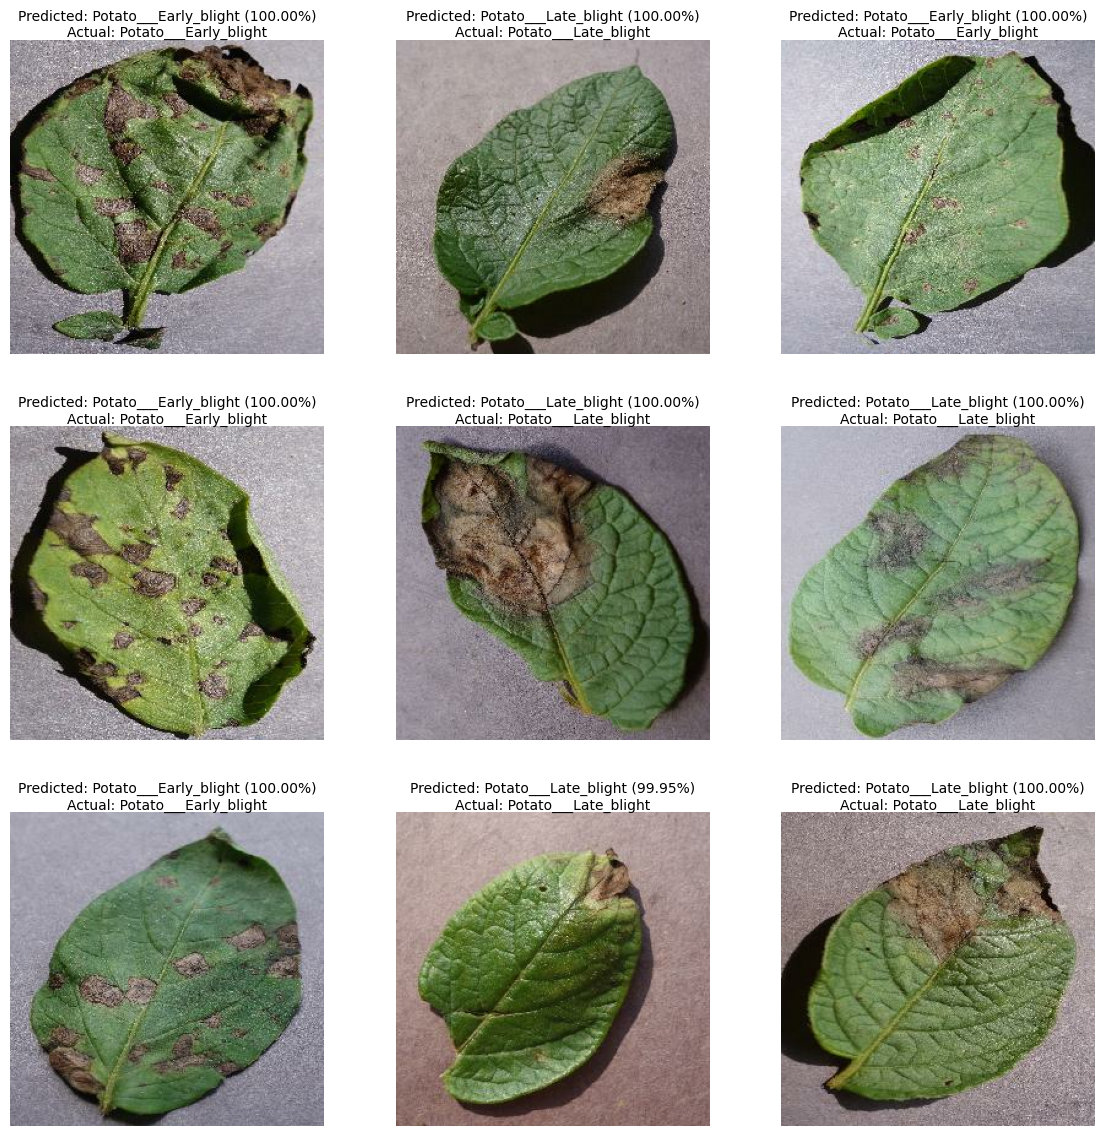

In [ ]:
for image_batch, label_batch in test_ds.take(1):
    predictions = model.predict(image_batch)
    predicted_labels = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        confidence = tf.reduce_max(predictions[i]).numpy() * 100
        ax.set_title(
            f"Predicted: {dataset.class_names[predicted_labels[i]]} ({confidence:.2f}%)\nActual: {dataset.class_names[label_batch[i]]}",
            fontsize=10,
            pad=1
        )
        plt.axis("off")

    plt.tight_layout(pad=3.0)  # Add padding between subplots
    plt.show()


In [ ]:
model_version = "v1.0"
model.save(f"../models/potato_disease_classification_{model_version}.h5")
print(f"Model saved as potato_disease_classification_{model_version}.h5")

Model saved as potato_disease_classification_v1.0.h5


: 